In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
import math
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_score, roc_auc_score, roc_curve, RocCurveDisplay


In [74]:
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. Logistic Regression

## Evaluating with cross validation

In [75]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [76]:
titanic_data.drop('Cabin', axis=1, inplace=True)

In [77]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [78]:
titanic_data = titanic_data.bfill()

In [79]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [80]:
titanic_data.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [81]:
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

In [82]:
scaler = StandardScaler()
titanic_data[num_features] = scaler.fit_transform(titanic_data[num_features])

In [83]:
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])

In [84]:
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)

In [85]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,-0.539468,0.432793,-0.473674,-0.502445,False,True
1,2,1,1,0,0.557213,0.432793,-0.473674,0.786845,False,False
2,3,1,3,0,-0.265298,-0.474545,-0.473674,-0.488854,False,True
3,4,1,1,0,0.351585,0.432793,-0.473674,0.420730,False,True
4,5,0,3,1,0.351585,-0.474545,-0.473674,-0.486337,False,True


In [86]:
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [90]:
model = LogisticRegression().fit(X_train, y_train)

C:\Users\PC\Documents\100_days_of_bytewise\Day_14\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy before cross validation: {accuracy}")

Accuracy before cross validation: 0.8044692737430168


In [102]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')



C:\Users\PC\Documents\100_days_of_bytewise\Day_14\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC\Documents\100_days_of_bytewise\Day_14\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [103]:
print(f"Cross validation scores: {cv_scores}")

Cross validation scores: [0.76536313 0.76966292 0.78089888 0.76966292 0.80337079]


## Calculating Precision, Recall, and F1-Score 

In [96]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")
print(f"Precision of the model: {precision}")
print(f"F1 score of the model: {f1}")
print(f"Recall of the model: {recall}")

Accuracy of the model: 0.8044692737430168
Precision of the model: 0.7857142857142857
F1 score of the model: 0.7154471544715447
Recall of the model: 0.6567164179104478


## Comparing Model Performance with and without Cross-Validation

Model's preformance parameters without cross-validation are shown above.
Model's performance with cross validation is shown below:

In [104]:
print(f"Cross validation scores: {cv_scores}")
print(f"Mean accuracy after cross validation: {cv_scores.mean()}")

Cross validation scores: [0.76536313 0.76966292 0.78089888 0.76966292 0.80337079]
Mean accuracy after cross validation: 0.7777917268219195


Accuracy score with single train test split is greater than mean cross validation score.

# 2. Decision Tree Classifier

In [106]:
train_accuracy = []
validation_accuracy = []
depths = range(1, 15)
for depth in depths:
    DT_model = DecisionTreeClassifier(max_depth=depth, random_state=42).fit(X_train, y_train)
    y_train_pred = DT_model.predict(X_train)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    y_test_pred = DT_model.predict(X_test)
    validation_accuracy.append(accuracy_score(y_test, y_test_pred))

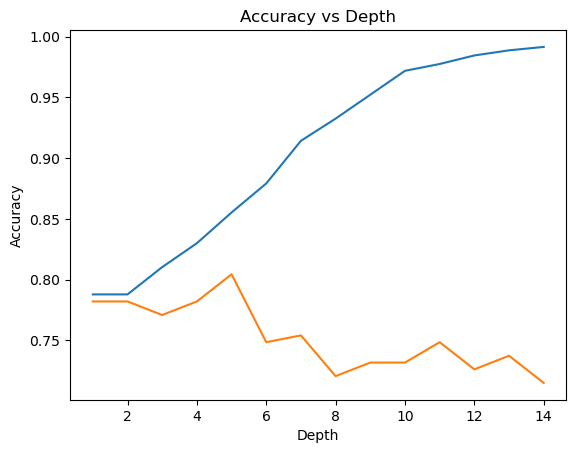

In [108]:
plt.figure()
plt.plot(depths, train_accuracy, label="Training Accuracy")
plt.plot(depths, validation_accuracy, label="Validation Accuracy")
plt.title("Accuracy vs Depth")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.show()

## ROC Curve Analysis

In [109]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

<Figure size 1000x600 with 0 Axes>

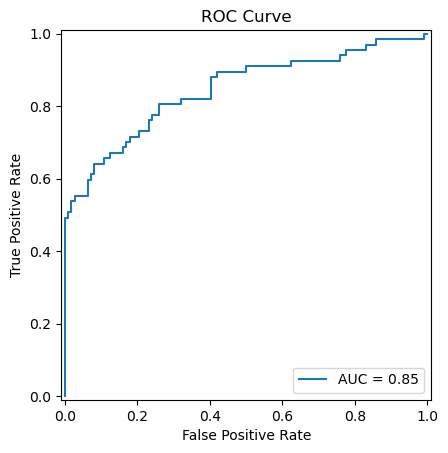

In [112]:
plt.figure(figsize=(10, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Comparing Model Performance with and without Cross-Validation

In [113]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy of the {DT_model} without cross validation: {accuracy}")
print(f"Precision of the {DT_model} without cross validation: {precision}")
print(f"F1 score of the {DT_model} without cross validation: {f1}")
print(f"Recall of the {DT_model} without cross validation: {recall}")

Accuracy of the DecisionTreeClassifier(max_depth=14, random_state=42) without cross validation: 0.8044692737430168
Precision of the DecisionTreeClassifier(max_depth=14, random_state=42) without cross validation: 0.7857142857142857
F1 score of the DecisionTreeClassifier(max_depth=14, random_state=42) without cross validation: 0.7154471544715447
Recall of the DecisionTreeClassifier(max_depth=14, random_state=42) without cross validation: 0.6567164179104478


In [117]:
cv_scores = cross_val_score(DT_model, X, y, cv=5, scoring="accuracy")

In [118]:
print(f"Cross validation scores for {DT_model}: {cv_scores}")


Cross validation scores for DecisionTreeClassifier(max_depth=14, random_state=42): [0.58100559 0.73033708 0.78651685 0.73595506 0.83146067]


In [119]:
print(f"Mean accuracy is: {cv_scores.mean()}")

Mean accuracy is: 0.7330550499027055


The performance of the model without cross validation is greater than with cross validation.